In [1]:
import warnings
warnings.filterwarnings("ignore")

# 🔬 Inset Maps

## How to create inset maps
```{eval-rst}
.. currentmodule:: eomaps.eomaps
```

Inset maps are used to show **zoomed-in regions of a map** and can be created with {py:meth}`Maps.new_inset_map`.

```{eval-rst}
.. autosummary::
    :nosignatures:

    Maps.new_inset_map
```

An inset-map is defined by providing a **center-position** and a **radius**.

The shape of the inset boundary can be one of the following options:
- projected "ellipses" or "rectangles" (with dimensions defined in a given coordinate-system)
- "geodesic_circles" (with a radius defined in meters).

:::{note}
[`InsetMaps`](eomaps.inset_maps.InsetMaps) can be used just like any other [`Maps`](eomaps.Maps) object!

For convenience, [`InsetMaps`](eomaps.inset_maps.InsetMaps) have the following **additional methods** defined:

```{eval-rst}
.. currentmodule:: eomaps.inset_maps

.. autosummary::
    :nosignatures:

    InsetMaps.set_inset_position
    InsetMaps.add_extent_indicator
    InsetMaps.add_indicator_line
```
:::

:::{tip}
To quickly re-position (and re-size) inset-maps, make sure to have a look at the {ref}`layout_editor`!

A more advanced example on how to use inset-maps is available here: {ref}`example_inset_maps`
:::


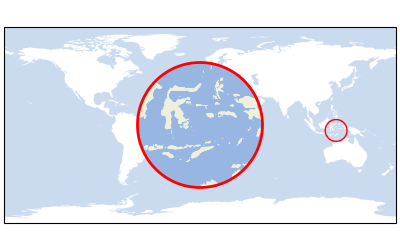

In [2]:
from eomaps import Maps
m = Maps(figsize=(4, 2.5))
m.add_feature.preset.ocean(alpha=0.5)

mi = m.new_inset_map(xy=(125, -5), radius=10)   # create a new inset-map
mi.add_feature.preset("ocean", "land")          # populate the inset-map with some features

m.show()

There are many ways to customize the appearance of an inset-map.  

:::{tip}
Inset-maps can have a different projection than the parent map!

You can also specify the position and radius of an inset-map in a coordinate system of your choice.
:::

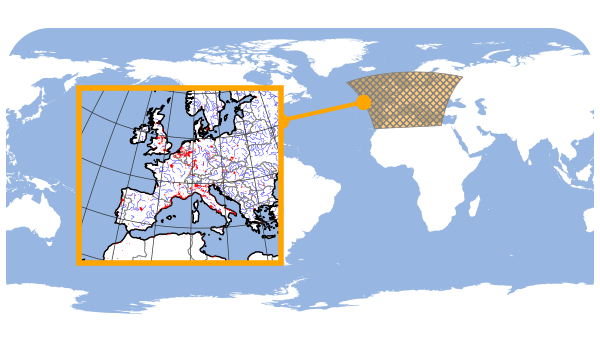

In [3]:
from eomaps import Maps
m = Maps(Maps.CRS.PlateCarree(central_longitude=-60), figsize=(6, 3.5))
m.add_feature.preset.ocean()
m.set_frame(ec="none", rounded=0.3)

m_i = m.new_inset_map(xy=(5, 45), xy_crs=4326,
                      radius=2e6, radius_crs=3035,
                      plot_position=(.3, .5), plot_size=.5,
                      shape="rectangles",
                      inset_crs=3035,
                      boundary=dict(ec="orange", lw=4),
                      indicate_extent=dict(fc=(1, 0.6, 0, .5), ec="0.5", lw=0.5, hatch="xxxxx"),
                      indicator_line=dict(lw=3, marker="o", ms=10)
                      )

m_i.add_feature.preset("coastline", "countries", "ocean", "urban_areas")
m_i.add_feature.physical.rivers_europe(ec="b", lw=0.25, fc="none")
m_i.add_feature.physical.lakes_europe(fc="b")
m_i.add_gridlines()
m.show()

(zoomed_in_views_on_datasets)=
## Zoomed in views on datasets

To create a "zoomed-in" view of a dataset, the data must be plotted on the inset-map with the same classification as the initial plot.

For this purpose, EOmaps provides 2 convenience-functions:

- [`Maps.inherit_data`](eomaps.Maps.inherit_data) : Use the same dataset as another [`Maps`](eomaps.Maps) object
- [`Maps.inherit_classification`](eomaps.Maps.inherit_classification): Use the same classification as another [`Maps`](eomaps.Maps) object

:::{note}
If the classification is inherited, also the the used ``colormap`` and the associated data-limits ``vmin`` and ``vmax`` will be the inherited!
:::

:::{tip}
You can still change the shape that is used for plotting to adjust the appearance of the data in the zoomed-in view!
:::

In [4]:
import numpy as np
x, y = np.meshgrid(np.linspace(-20, 20, 50), np.linspace(-50, 60, 100))
data = x + y

Create a map and plot a classified dataset.

In [5]:
from eomaps import Maps
m = Maps(ax=131)
m.add_feature.preset.coastline()
m.set_data(data, x, y)
m.set_shape.raster()
m.set_classify.Quantiles(k=10)
m.plot_map(cmap="tab10", vmin=-10, vmax=40)

Create a new inset-map that shows a zoomed-in view on the dataset.

In [6]:
m_i = m.new_inset_map(xy=(-5, 35), radius=8, 
                      plot_position=(0.7, .5), plot_size=.7, indicator_line=True)
m_i.add_title("A zoomed-in view on a dataset!", y=1.05)

m_i.add_feature.preset.coastline()
m_i.add_feature.preset.ocean(alpha=0.4, zorder=10, hatch="///", ec="darkblue")

m_i.inherit_data(m)            # inherit the data from "m"
m_i.inherit_classification(m)  # inherit the classification from "m"
m_i.set_shape.rectangles()     # switch to a different shape for plotting
m_i.plot_map(ec="k", lw=0.5)

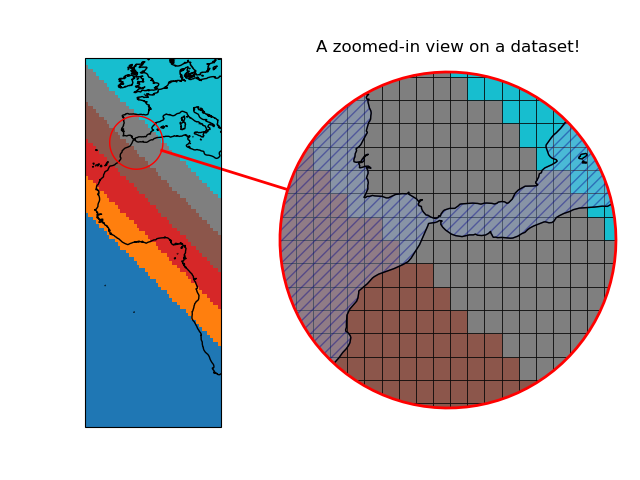

In [7]:
m.show()